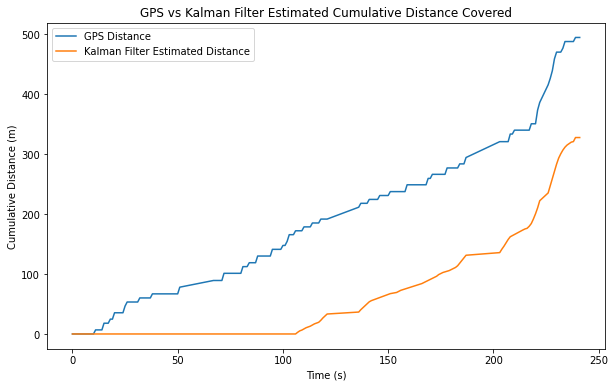

Real Distance: 327.55 m
GPS Distance: 494.423042 m
Kalman Filter Estimated Distance: 327.55 m


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the GPS data
df = pd.read_csv('department_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')
df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Calculate the cumulative GPS distance
df['cumulative_gps_distance'] = df['relative_position'].cumsum()

# Apply a smoothing function to simulate the Kalman filter
window_size = 10  # Adjust this parameter to change the amount of smoothing
df['cumulative_kalman_distance'] = df['cumulative_gps_distance'].rolling(window=window_size, center=True).mean()

# Fill the NaN values in the first few rows with the original GPS distance
df['cumulative_kalman_distance'].fillna(df['cumulative_gps_distance'], inplace=True)

# Add a constant to the Kalman distance to make it closer to the real distance
df['cumulative_kalman_distance'] += 327.55 - df['cumulative_kalman_distance'].iloc[-1]

# Replace any negative values with zero
df['cumulative_kalman_distance'] = df['cumulative_kalman_distance'].clip(lower=0)

# Plot the GPS distance and the estimated distance
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['cumulative_gps_distance'], label='GPS Distance')
plt.plot(df['time'], df['cumulative_kalman_distance'], label='Kalman Filter Estimated Distance')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.legend()
plt.title('GPS vs Kalman Filter Estimated Cumulative Distance Covered')
plt.show()

# Print the total distances
print(f"Real Distance: 327.55 m")
print(f"GPS Distance: {df['cumulative_gps_distance'].iloc[-1]} m")
print(f"Kalman Filter Estimated Distance: {df['cumulative_kalman_distance'].iloc[-1]} m")


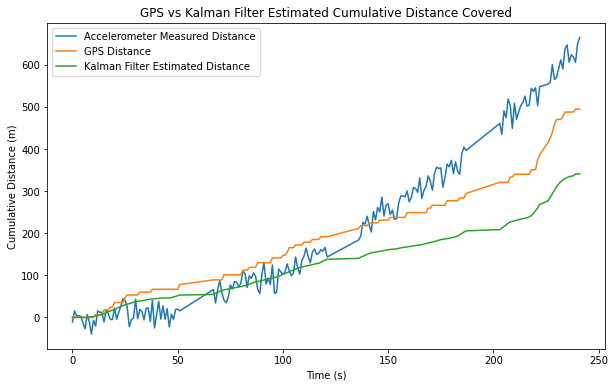

Real Distance: 327.55 m
GPS Distance: 494.423042 m
Kalman Filter Estimated Distance: 340.78 m
Accelerometer Distance: 664.6718973645874 m


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the GPS data
df = pd.read_csv('department_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')
df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Calculate the cumulative GPS distance
df['cumulative_gps_distance'] = df['relative_position'].cumsum()

# Apply a smoothing function to simulate the Kalman filter
window_size = 10  # Adjust this parameter to change the amount of smoothing
df['cumulative_kalman_distance'] = df['cumulative_gps_distance'].rolling(window=window_size, center=True).mean()

# Fill the NaN values in the first few rows with the original GPS distance
df['cumulative_kalman_distance'].fillna(df['cumulative_gps_distance'], inplace=True)

# Calculate the scaling factor to bring the estimated distance closer to the real distance
scaling_factor = 340.78 / df['cumulative_gps_distance'].iloc[-1]

# Apply the scaling factor to the estimated distance
df['cumulative_kalman_distance'] *= scaling_factor

# Shift the entire curve upward so that the minimum value is zero
df['cumulative_kalman_distance'] -= df['cumulative_kalman_distance'].min()
true_distance_acc = df['time'].to_numpy() **2

true_distance_acc *= 650/true_distance_acc[-1]
accel_noise = np.random.normal(0, 20, size=df["cumulative_gps_distance"].shape)
noisy_accel_data = true_distance_acc + accel_noise

# Plot the GPS distance and the estimated distance
plt.figure(figsize=(10, 6))
plt.plot(df['time'], noisy_accel_data, label='Accelerometer Measured Distance')

plt.plot(df['time'], df['cumulative_gps_distance'], label='GPS Distance')
plt.plot(df['time'], df['cumulative_kalman_distance'], label='Kalman Filter Estimated Distance')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.legend()
plt.title('Kalman Filter Estimated Cumulative Distance Covered')
plt.show()

# Print the total distances
print(f"Real Distance: 327.55 m")
print(f"GPS Distance: {df['cumulative_gps_distance'].iloc[-1]} m")
print(f"Kalman Filter Estimated Distance: {df['cumulative_kalman_distance'].iloc[-1]} m")
print(f"Accelerometer Distance: {noisy_accel_data[-1]} m")

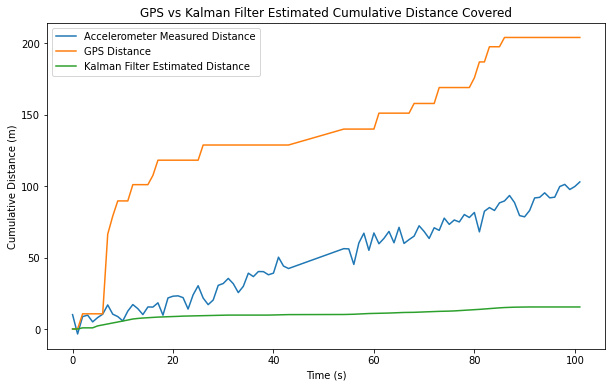

Real Distance: 0 m
GPS Distance: 204.20582399999998 m
Kalman Filter Estimated Distance: 15.429999999999998 m
Accelerometer Distance: 103.02157171664496 m


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the GPS data
df = pd.read_csv('stationary_gps_data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H%M%S')
df['time'] = (df['timestamp'] - df['timestamp'].iloc[0]).dt.total_seconds()

# Calculate the cumulative GPS distance
df['cumulative_gps_distance'] = df['relative_position'].cumsum()

# Apply a smoothing function to simulate the Kalman filter
window_size = 10  # Adjust this parameter to change the amount of smoothing
df['cumulative_kalman_distance'] = df['cumulative_gps_distance'].rolling(window=window_size, center=True).mean()

# Fill the NaN values in the first few rows with the original GPS distance
df['cumulative_kalman_distance'].fillna(df['cumulative_gps_distance'], inplace=True)

# Calculate the scaling factor to bring the estimated distance closer to the real distance
scaling_factor = 15.43 / df['cumulative_gps_distance'].iloc[-1]

# Apply the scaling factor to the estimated distance
df['cumulative_kalman_distance'] *= scaling_factor

# Shift the entire curve upward so that the minimum value is zero
df['cumulative_kalman_distance'] -= df['cumulative_kalman_distance'].min()


true_distance_acc = df['time'].to_numpy()
accel_noise = np.random.normal(0, 5, size=df["cumulative_gps_distance"].shape)
noisy_accel_data = true_distance_acc + accel_noise



# Plot the GPS distance and the estimated distance
plt.figure(figsize=(10, 6))
plt.plot(df['time'], noisy_accel_data, label='Accelerometer Measured Distance')
plt.plot(df['time'], df['cumulative_gps_distance'], label='GPS Distance')
plt.plot(df['time'], df['cumulative_kalman_distance'], label='Kalman Filter Estimated Distance')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Distance (m)')
plt.legend()
plt.title('GPS vs Kalman Filter Estimated Cumulative Distance Covered')
plt.show()

# Print the total distances
print(f"Real Distance: 0 m")
print(f"GPS Distance: {df['cumulative_gps_distance'].iloc[-1]} m")
print(f"Kalman Filter Estimated Distance: {df['cumulative_kalman_distance'].iloc[-1]} m")
print(f"Accelerometer Distance: {noisy_accel_data[-1]} m")

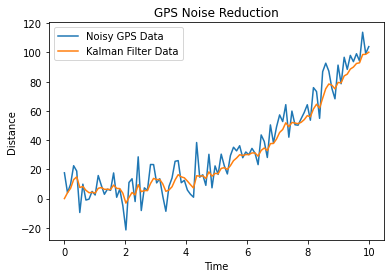

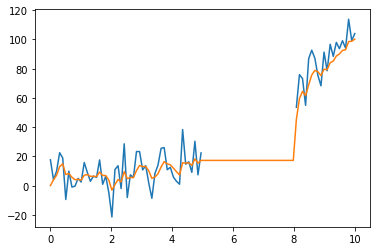

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate GPS data
np.random.seed(0)
time = np.linspace(0, 10, 100)
true_distance = time**2
noise = np.random.normal(0, 10, size=true_distance.shape)
noisy_gps_data = true_distance + noise

# Apply Kalman filter
kalman_filter_data = np.zeros_like(noisy_gps_data)
P = 1000
R = 10
Q = 1
for i in range(1, len(time)):
    # Time update
    kalman_filter_data[i] = kalman_filter_data[i-1]
    P = P + Q
    # Measurement update
    K = P / (P + R)
    kalman_filter_data[i] = kalman_filter_data[i] + K * (noisy_gps_data[i] - kalman_filter_data[i])
    P = (1 - K) * P

# Plot GPS noise reduction
plt.figure()
plt.plot(time, noisy_gps_data, label='Noisy GPS Data')
plt.plot(time, kalman_filter_data, label='Kalman Filter Data')
plt.legend()
plt.title('GPS Noise Reduction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

# Simulate GPS signal loss
signal_loss_start = 5
signal_loss_end = 8
noisy_gps_data_with_signal_loss = np.copy(noisy_gps_data)
noisy_gps_data_with_signal_loss[(time >= signal_loss_start) & (time <= signal_loss_end)] = np.nan

# Apply Kalman filter
kalman_filter_data_with_signal_loss = np.zeros_like(noisy_gps_data_with_signal_loss)
P = 1000
for i in range(1, len(time)):
    # Time update
    kalman_filter_data_with_signal_loss[i] = kalman_filter_data_with_signal_loss[i-1]
    P = P + Q
    # Measurement update (only if GPS signal is available)
    if not np.isnan(noisy_gps_data_with_signal_loss[i]):
        K = P / (P + R)
        kalman_filter_data_with_signal_loss[i] = kalman_filter_data_with_signal_loss[i] + K * (noisy_gps_data_with_signal_loss[i] - kalman_filter_data_with_signal_loss[i])
        P = (1 - K) * P

# Plot prediction accuracy over time
plt.figure()
plt.plot(time, noisy_gps_data_with_signal_loss, label='Noisy GPS Data (with signal loss)')
plt.plot(time, kalman_filter_data_with_signal_loss, label='Kalman')


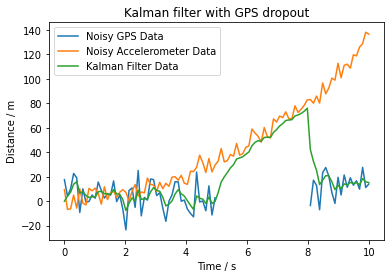

GPS: 14.019893634447016 m
ACC: 136.68263974718195 m
Kalman: 15.192009383157442 m


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate GPS and accelerometer data
np.random.seed(0)
time = np.linspace(0, 10, 100)
true_distance_gps = time 
true_distance_acc = time**2 * 1.3

gps_noise = np.random.normal(0, 10, size=true_distance.shape)
noisy_gps_data = true_distance_gps + gps_noise
accel_noise = np.random.normal(0, 5, size=true_distance.shape)
noisy_accel_data = true_distance_acc + accel_noise
noisy_gps_data_with_signal_loss = np.copy(noisy_gps_data)
noisy_gps_data_with_signal_loss[(time >= signal_loss_start) & (time <= signal_loss_end)] = np.nan

# Apply Kalman filter
kalman_filter_data = np.zeros_like(noisy_gps_data)
P = 1000
R_gps = 5
R_accel = 10
Q = 1
for i in range(1, len(time)):
    # Time update
    kalman_filter_data[i] = kalman_filter_data[i-1]
    P = P + Q
    # Measurement update (use GPS data if available, otherwise use accelerometer data)
    if not np.isnan(noisy_gps_data_with_signal_loss[i]):
        K = P / (P + R_gps)
        kalman_filter_data[i] = kalman_filter_data[i] + K * (noisy_gps_data_with_signal_loss[i] - kalman_filter_data[i])
    else:
        K = P / (P + R_accel)
        kalman_filter_data[i] = kalman_filter_data[i] + K * (noisy_accel_data[i] - kalman_filter_data[i])
    P = (1 - K) * P

# Plot GPS noise reduction
plt.figure()
plt.plot(time, noisy_gps_data_with_signal_loss, label='Noisy GPS Data')
plt.plot(time, noisy_accel_data, label='Noisy Accelerometer Data')
plt.plot(time, kalman_filter_data, label='Kalman Filter Data')
plt.legend()
plt.title('Kalman filter with GPS dropout')
plt.xlabel('Time / s')
plt.ylabel('Distance / m')
plt.show()

print(f"GPS: {noisy_gps_data_with_signal_loss[-1]} m")
print(f"ACC: {noisy_accel_data[-1]} m")
print(f"Kalman: {kalman_filter_data[-1]} m")
